In [6]:

from gammapy.modeling.models import (
    PowerLawSpectralModel,
    SkyModel,
    Model, 
    Models,
    TemplateSpatialModel
)
from gammapy.maps import Map

In [7]:
path_tempalates = "/Users/asinha/Work/Molecular_clouds/Spatial_Templates/"

In [8]:
index = 243

(<Figure size 432x288 with 1 Axes>,
 <WCSAxesSubplot:xlabel='Galactic Longitude', ylabel='Galactic Latitude'>,
 None)

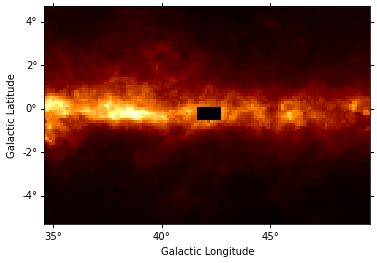

In [9]:
spectrum_diffuse = PowerLawSpectralModel()
spectrum_diffuse.amplitude.value = 2e-13
spectrum_diffuse.index.value = 2.7
# Diffuse spatial from Giada - CO
file_diffuse = path_tempalates + "HIH2_spacecut_woCloud" + str(index) + "_fromdust.fits"
map_diffuse = Map.read(file_diffuse)
map_diffuse.plot()

In [10]:
map_diffuse.data[map_diffuse.data < 0.0] = 0.0
spatial_diffuse = TemplateSpatialModel(map=map_diffuse)
model_diffuse = SkyModel(spectral_model=spectrum_diffuse,
                        spatial_model=spatial_diffuse,
                        name='diffuse')

In [11]:
models = Models([model_diffuse])

In [12]:
models.write('test.yaml')

In [13]:
model1 = Models.read('test.yaml')

TypeError: expected str, bytes or os.PathLike object, not NoneType